In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('joint_mm_va.csv')
df.head()

,Dimensions,Blocks,Threads,Time,Speedup,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,...,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy(,cudaFree
0,2,1,1,0.09,1.000,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,...,1.0,28,0,27,1,0,10,3,4,3
1,2,1,2,0.09,1.000,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,...,1.0,28,0,27,1,0,10,3,4,3
2,2,1,3,0.09,1.000,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,...,1.0,28,0,27,1,0,10,3,4,3
3,2,1,4,0.09,1.000,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,...,1.0,28,0,27,1,0,10,3,4,3
4,2,1,5,0.08,1.125,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,...,1.0,28,0,27,1,0,10,3,4,3


In [4]:
y = df['Speedup'].values
df.drop(['Speedup'], axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151 entries, 0 to 5150
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Dimensions                          5151 non-null   int64  
 1   Blocks                              5151 non-null   int64  
 2   Threads                             5151 non-null   int64  
 3   Time                                5151 non-null   float64
 4   Device Name                         5151 non-null   object 
 5   Compute Capability                  5151 non-null   float64
 6   Total Global Memory                 5151 non-null   float64
 7   Shared Memory per Block             5151 non-null   float64
 8   Registers per Block                 5151 non-null   float64
 9   Warp Size                           5151 non-null   float64
 10  Maximum Threads per Block           5151 non-null   float64
 11  Thread Dimension Z                  5151 no

In [7]:
df['Device Name'].unique().tolist()

['NVIDIA GeForce GTX TITAN Black']

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

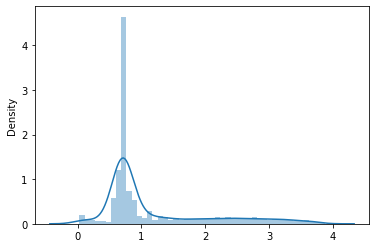

In [39]:
sns.distplot(np.log1p(y))

In [8]:
X = df.drop(['Device Name'], axis = 1)

In [9]:
X.columns

Index(['Dimensions', 'Blocks', 'Threads', 'Time', 'Compute Capability',
       'Total Global Memory', 'Shared Memory per Block', 'Registers per Block',
       'Warp Size', 'Maximum Threads per Block', 'Thread Dimension Z',
       'Thread Dimension Y', 'Thread Dimension X', 'Grid Size Z',
       'Grid Size Y', 'Grid Size X', 'Clock Rate', 'Total Constant Memory',
       'Multiprocessor Count', 'integrated', 'Asynchronous Engine Count',
       'Memory Bus Width', 'Memory Clock Rate', 'L2 Cache Size',
       'Maximum Threads per Multiprocessor', 'Concurrent Kernels', 'float',
       'unsigned_int', 'int', 'num_blocks', 'num_grid', 'threads',
       'cudaMalloc', 'cudaMemcpy(', 'cudaFree'],
      dtype='object')

In [32]:
sc = RobustScaler()
X_scaled = sc.fit_transform(X)

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

In [34]:
def evaluate_model(model, X_train, y_train, X_val, y_val, metric='R2'):
    model.fit(X_train, y_train)
    if metric == 'RMSE':
        y_pred_train = model.predict(X_train)
        print('Training RMSE score = {}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
        y_pred = model.predict(X_val)
        print('Validation RMSE score = {}'.format(np.sqrt(mean_squared_error(y_val, y_pred))))
    else:
        print('Training R2 score = {}'.format(model.score(X_train, y_train)))
        print('Validation R2 score = {}'.format(model.score(X_val, y_val)))

In [35]:
lr = LinearRegression()
evaluate_model(lr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 7.3535396168516405
Validation RMSE score = 7.225769878529377


In [36]:
lasso = Lasso()
evaluate_model(lasso, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 7.4668483347303125
Validation RMSE score = 7.3276852954387826


In [37]:
ridge = Ridge()
evaluate_model(ridge, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 7.353539690206726
Validation RMSE score = 7.225759864391926


In [42]:
svr = SVR()
evaluate_model(svr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 4.9766767837968535
Validation RMSE score = 4.973092750677678


In [43]:
lsvr = LinearSVR()
evaluate_model(lsvr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 8.076008070318382
Validation RMSE score = 7.934653659742238


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
